In [1]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

In [45]:
import pickle

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df = pd.read_csv('data/vgsales2.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16452 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16669 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [7]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16452.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487175,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878671,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [8]:
df.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092554,0.003842,-0.168376,0.037703,-0.076427,0.011563,0.223465,-0.267747,0.175356
NA_Sales,-0.092554,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.086200,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.055337,0.283360
JP_Sales,-0.168376,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.125598,0.075638
Other_Sales,0.037703,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.057119,0.238982
Global_Sales,-0.076427,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.088139,0.265012
Critic_Score,0.011563,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.580878,0.264376
Critic_Count,0.223465,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.194133,0.362334
User_Score,-0.267747,0.086200,0.055337,0.125598,0.057119,0.088139,0.580878,0.194133,1.000000,0.027044
User_Count,0.175356,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,0.027044,1.000000


### Data Cleaning

In [9]:
#Checking for missing values
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     267
Genre                 2
Publisher            50
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [10]:
# Dropping columns with many missing values that are not valuable
df.drop(['Critic_Count', 'User_Count', 'Critic_Score', 'Global_Sales'], axis=1, inplace=True)

In [11]:
#Dropping rows with too many missing values
for index in df[df['User_Score'].isna()].index:
  df.drop(index, axis=0, inplace=True)

for index in df[df['Developer'].isna()].index:
  df.drop(index, axis=0, inplace=True)

for index in df[df['Rating'].isna()].index:
  df.drop(index, axis=0, inplace=True)

for index in df[df['Year_of_Release'].isna()].index:
  df.drop(index, axis=0, inplace=True)

In [12]:
# Cleaning Publisher column
df[df['Publisher'].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score,Developer,Rating


In [13]:
#Checking for missing values
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
User_Score         0
Developer          0
Rating             0
dtype: int64

In [14]:
#Checking for duplicates in data
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7382 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7382 non-null   object 
 1   Platform         7382 non-null   object 
 2   Year_of_Release  7382 non-null   float64
 3   Genre            7382 non-null   object 
 4   Publisher        7382 non-null   object 
 5   NA_Sales         7382 non-null   float64
 6   EU_Sales         7382 non-null   float64
 7   JP_Sales         7382 non-null   float64
 8   Other_Sales      7382 non-null   float64
 9   User_Score       7382 non-null   float64
 10  Developer        7382 non-null   object 
 11  Rating           7382 non-null   object 
dtypes: float64(6), object(6)
memory usage: 749.7+ KB


In [16]:
#Year of release is better as categorical
df['Year_of_Release'] = df['Year_of_Release'].astype('str')

In [17]:
df = df.reset_index(drop=True)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,8.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,8.3,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,8.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,8.5,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,6.6,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...
7377,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,8.8,Criterion Games,M
7378,Worms 2,PC,1997.0,Strategy,Microprose,0.00,0.01,0.00,0.00,8.1,Team 17,K-A
7379,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,7.6,Kojima Productions,M
7380,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,5.8,Atomic Games,T


### EDA

In [18]:
df_categorical=df.select_dtypes(include=object)
df_numeric=df.select_dtypes(include=np.number)

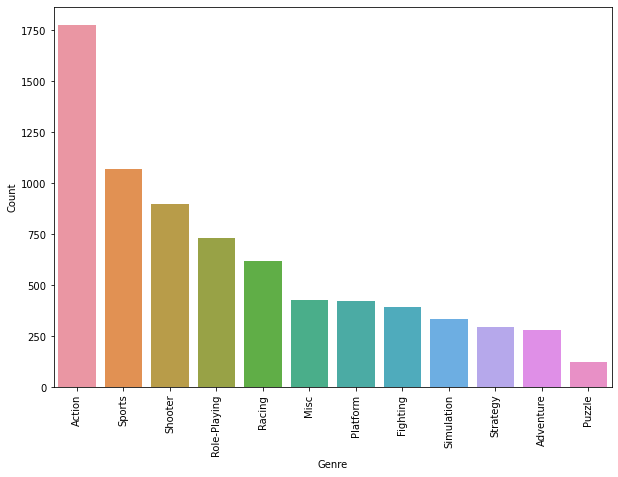

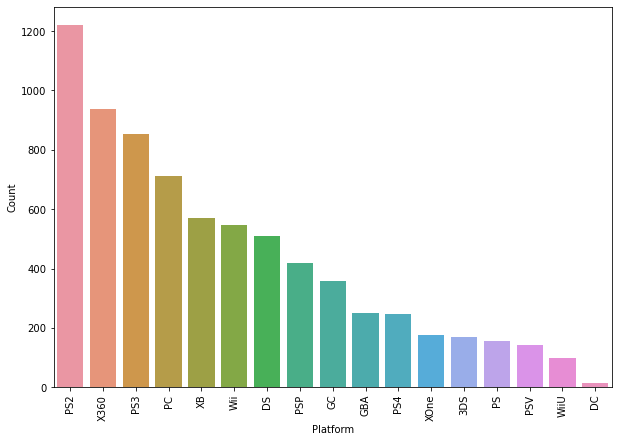

In [19]:
a=["Genre","Platform"]
for i in a:
    plt.figure(figsize=(10,7))
    sns.barplot(x=df_categorical[i].value_counts().index,y=df_categorical[i].value_counts().values)
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

In [20]:
publishers=df_categorical.Publisher.value_counts().head(20)
publishers

Electronic Arts                           1013
Activision                                 565
Ubisoft                                    552
THQ                                        340
Sony Computer Entertainment                327
Take-Two Interactive                       301
Nintendo                                   291
Sega                                       291
Konami Digital Entertainment               264
Namco Bandai Games                         257
Capcom                                     201
Atari                                      184
Warner Bros. Interactive Entertainment     158
Microsoft Game Studios                     146
Tecmo Koei                                 141
Square Enix                                139
Eidos Interactive                          128
Vivendi Games                              120
Codemasters                                113
Midway Games                               108
Name: Publisher, dtype: int64

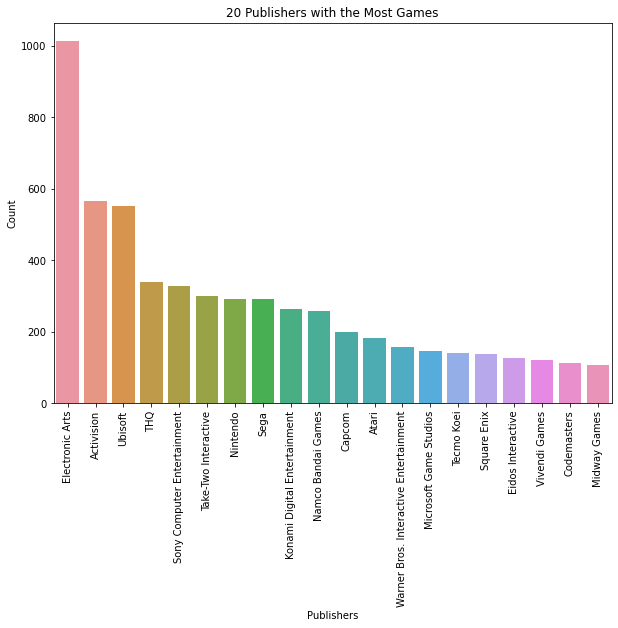

In [21]:
plt.figure(figsize=(10,7))

sns.barplot(x=publishers.index,y=publishers.values)
plt.xticks(rotation=90)
plt.xlabel('Publishers')
plt.ylabel('Count')
plt.title("20 Publishers with the Most Games")
plt.show()

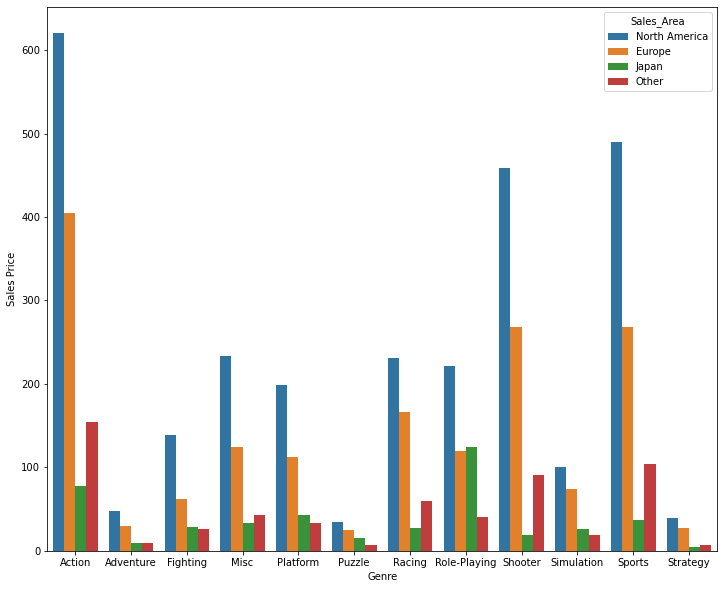

In [22]:
# Total Sales by Genres
genre_sales=df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(['Genre'],as_index=False).sum()
genre_sales=genre_sales.set_axis(['Genre', 'North America', 'Europe', 'Japan','Other'], axis=1, inplace=False)
Genre_Sales=pd.melt(genre_sales,
                    id_vars=['Genre'],
                    value_vars=['North America', 'Europe', 'Japan', 'Other'],
                    var_name='Sales_Area', value_name='Sales_Price')
plt.figure(figsize=(12,10))
sns.barplot(data=Genre_Sales,x='Genre',y='Sales_Price',hue='Sales_Area')
plt.ylabel('Sales Price')
plt.show()

### PreProcessing

In [23]:
# Creating dataframe of the y variable (Game names)
df_game_name = pd.DataFrame({'Game': df['Name']}).reset_index(drop=True)
df_game_name.tail()

,Game
7377,Mortal Kombat: Deadly Alliance
7378,Worms 2
7379,Metal Gear Solid V: Ground Zeroes
7380,Breach
7381,STORM: Frontline Nation


In [24]:
df.set_index('Name', inplace=True)
df.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score,Developer,Rating
Name,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,8.0,Nintendo,E
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,8.3,Nintendo,E
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,8.0,Nintendo,E
New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,8.5,Nintendo,E
Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,6.6,Nintendo,E


In [25]:
column_object = df.dtypes[df.dtypes == 'object'].keys()
column_object

Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Developer',
       'Rating'],
      dtype='object')

In [26]:
one_hot_label = pd.get_dummies(df[column_object])
one_hot_label.head(3)

,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,...,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Mario Kart Wii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Wii Sports Resort,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
df.drop(column_object,axis=1,inplace=True)
df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score
Name,,,,,
Wii Sports,41.36,28.96,3.77,8.45,8.0
Mario Kart Wii,15.68,12.76,3.79,3.29,8.3
Wii Sports Resort,15.61,10.93,3.28,2.95,8.0
New Super Mario Bros.,11.28,9.14,6.50,2.88,8.5
Wii Play,13.96,9.18,2.93,2.84,6.6


In [28]:
df = pd.concat([df,one_hot_label],axis=1)
df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,...,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,41.36,28.96,3.77,8.45,8.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Mario Kart Wii,15.68,12.76,3.79,3.29,8.3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Wii Sports Resort,15.61,10.93,3.28,2.95,8.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
New Super Mario Bros.,11.28,9.14,6.50,2.88,8.5,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
Wii Play,13.96,9.18,2.93,2.84,6.6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
column_numeric = list(df.dtypes[df.dtypes == 'float64'].keys())
column_numeric

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'User_Score']

In [30]:
scaler = MinMaxScaler()

In [31]:
scaled = scaler.fit_transform(df[column_numeric])

In [32]:
i=0
for column in column_numeric:
    df[column] = scaled[:,i]
    i += 1

In [33]:
df.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,...,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
count,7382.000000,7382.000000,7382.000000,7382.000000,7382.000000,7382.000000,7382.000000,7382.000000,7382.000000,7382.000000,...,7382.000000,7382.000000,7382.000000,7382.000000,7382.000000,7382.000000,7382.000000,7382.000000,7382.000000,7382.000000
mean,0.009207,0.007862,0.009263,0.007617,0.734787,0.023029,0.001897,0.069222,0.034002,0.048361,...,0.000271,0.000135,0.000135,0.316716,0.139122,0.000135,0.000406,0.202113,0.000135,0.341235
std,0.022629,0.022995,0.042656,0.024760,0.154709,0.150006,0.043511,0.253849,0.181246,0.214542,...,0.016459,0.011639,0.011639,0.465227,0.346097,0.011639,0.020156,0.401603,0.011639,0.474156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001451,0.000691,0.000000,0.000946,0.659794,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.003385,0.002072,0.000000,0.001892,0.773196,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.009188,0.006906,0.001538,0.006623,0.845361,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Recommendation Model: Cosine Similarity

In [51]:
# Calculate the cosine similarity of the dataframe
cosine_sim = cosine_similarity(df)

# Keep the result of the calculation dataframe
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_game_name['Game'], columns=df_game_name['Game'])
cosine_sim_df.tail(5
                  )

Game,Wii Sports,Mario Kart Wii,Wii Sports Resort,New Super Mario Bros.,Wii Play,New Super Mario Bros. Wii,Mario Kart DS,Wii Fit,Kinect Adventures!,Wii Fit Plus,...,Rugby Challenge 3,Fast Racing Neo,Ben 10 Omniverse 2,Bookworm Deluxe,E.T. The Extra-Terrestrial,Mortal Kombat: Deadly Alliance,Worms 2,Metal Gear Solid V: Ground Zeroes,Breach,STORM: Frontline Nation
Game,,,,,,,,,,,,,,,,,,,,,
Mortal Kombat: Deadly Alliance,0.092212,0.108480,0.106048,0.107504,0.089634,0.109858,0.113637,0.103465,0.087759,0.100914,...,0.092956,0.116988,0.072889,0.110827,0.190405,1.000000,0.112069,0.254674,0.082363,0.100723
Worms 2,0.085685,0.100793,0.098531,0.099883,0.083280,0.102065,0.105580,0.096131,0.081530,0.093762,...,0.086361,0.108689,0.067718,0.252469,0.032428,0.112069,1.000000,0.248558,0.229772,0.395522
Metal Gear Solid V: Ground Zeroes,0.080904,0.095167,0.093031,0.094308,0.078632,0.096368,0.099687,0.090765,0.076979,0.088528,...,0.081540,0.252088,0.219146,0.247661,0.188558,0.254674,0.248558,1.000000,0.226463,0.240275
Breach,0.062973,0.074074,0.072414,0.073406,0.061206,0.075015,0.077594,0.070648,0.059926,0.068906,...,0.063470,0.079879,0.049768,0.229120,0.023833,0.082363,0.229772,0.226463,1.000000,0.378682
STORM: Frontline Nation,0.077016,0.090592,0.088558,0.089773,0.074851,0.091734,0.094893,0.086401,0.073277,0.084271,...,0.077618,0.097685,0.216815,0.243706,0.029145,0.100723,0.395522,0.240275,0.378682,1.000000


In [35]:
cosine_sim.shape

(7382, 7382)

In [36]:
cosine_sim

array([[1.        , 0.71794773, 0.82804557, ..., 0.08090442, 0.06297258,
        0.07701577],
       [0.71794773, 1.        , 0.72906463, ..., 0.09516747, 0.07407406,
        0.09059173],
       [0.82804557, 0.72906463, 1.        , ..., 0.09303128, 0.0724136 ,
        0.08855812],
       ...,
       [0.08090442, 0.09516747, 0.09303128, ..., 1.        , 0.22646334,
        0.24027466],
       [0.06297258, 0.07407406, 0.0724136 , ..., 0.22646334, 1.        ,
        0.37868169],
       [0.07701577, 0.09059173, 0.08855812, ..., 0.24027466, 0.37868169,
        1.        ]])

In [37]:
def recommend(game):

    #find the index of the movies
    game_index = df_game_name[df_game_name['Game']==game].index[0]
    distances = cosine_sim[game_index]
    games_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    

    #to fetch movies from indeces
    for i in games_list:
        print(df_game_name.iloc[i[0]].Game)

In [38]:
recommend('Mortal Kombat: Deadly Alliance')

Mortal Kombat: Deadly Alliance
Mortal Kombat: Deception
Mortal Kombat: Armageddon
Mortal Kombat: Deadly Alliance
RedCard 20-03


In [39]:
df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,...,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,1.000000,1.000000,0.580000,0.799432,0.824742,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Mario Kart Wii,0.379110,0.440608,0.583077,0.311258,0.855670,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Wii Sports Resort,0.377418,0.377417,0.504615,0.279092,0.824742,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
New Super Mario Bros.,0.272727,0.315608,1.000000,0.272469,0.876289,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
Wii Play,0.337524,0.316989,0.450769,0.268685,0.680412,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mortal Kombat: Deadly Alliance,0.000242,0.000000,0.000000,0.000000,0.907216,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
Worms 2,0.000000,0.000345,0.000000,0.000000,0.835052,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Metal Gear Solid V: Ground Zeroes,0.000000,0.000345,0.000000,0.000000,0.783505,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
df.to_csv('data/clean_data.csv', index= False)

In [46]:
pickle.dump(df_game_name.to_dict(),open('games.pkl','wb'))

In [50]:
pickle.dump(cosine_sim,open('cosine_sim.pkl','wb'))